<a href="https://colab.research.google.com/github/tbazzi/Data-Science---Fullstack-Bootcamp/blob/master/S6_2_Multi_label_with_Fast_Ai_SOLUTIONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi Label Classification 

Sur des images, il est fortement possible que vous n'ayez pas qu'une seule prédiction à faire. C'est ce que nous allons voir avec cet exemple d'images satellitaires où le but de l'algorithme va être d'essayer de décrire ce qu'il voir sur l'image 

1. Importez le module ```fastai.vision```

In [0]:
from fastai.vision import *

2. Nous allons cette fois nous attaquer au dataset ```URLs.PLANET_TINY``` qui est une série d'images satellitaires. Via la fonction ```untar_data``` importez le dataset

In [0]:
# Posixpath is a special thing to deal with Paths in Python. 
# Documentation : https://docs.python.org/3/library/pathlib.html
planet = untar_data(URLs.PLANET_TINY)
planet


PosixPath('/root/.fastai/data/planet_tiny')

3. Pour des images satellitaires qui sont par définition prises depuis le ciel, nous devons faire un preprocessing assez spécifique. Utilisez la fonction ```get_transform()``` dans laquelle vous spécifierez en paramètres ```flip_vert=True```, ```max_lighting=0.1```, ```max_zoom=1.05``` et ```max_warp=0```)

Stockez ceci dans une variable ```planet_tfms```

In [0]:
planet_tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)
planet_tfms

([RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'padding_mode': 'reflection'}, p=1.0, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmAffine (dihedral_affine), kwargs={}, p=1.0, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-10.0, 10.0)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmAffine (zoom), kwargs={'scale': (1.0, 1.05), 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmLighting (brightness), kwargs={'change': (0.45, 0.55)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmLighting (contrast), kwargs={'scale': (0.9, 1.1111111111111112)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True)],
 [RandTransform(tfm=TfmCrop (crop_pad), kwargs={}, p=1.0, resolved={}, do_run=

4. Il est important de savoir ce que contient notre dataset, pour cela, utilisez la fonction ```glob("*/")``` qui pourra nous donner la liste de tout ce que contient notre dataset 

In [0]:
# Get all the files inside planet_tiny folder
list(planet.glob('**/*'))

[PosixPath('/root/.fastai/data/planet_tiny/labels.csv'),
 PosixPath('/root/.fastai/data/planet_tiny/train'),
 PosixPath('/root/.fastai/data/planet_tiny/train/train_12451.jpg'),
 PosixPath('/root/.fastai/data/planet_tiny/train/train_31374.jpg'),
 PosixPath('/root/.fastai/data/planet_tiny/train/train_3256.jpg'),
 PosixPath('/root/.fastai/data/planet_tiny/train/train_427.jpg'),
 PosixPath('/root/.fastai/data/planet_tiny/train/train_19208.jpg'),
 PosixPath('/root/.fastai/data/planet_tiny/train/train_34558.jpg'),
 PosixPath('/root/.fastai/data/planet_tiny/train/train_30722.jpg'),
 PosixPath('/root/.fastai/data/planet_tiny/train/train_8348.jpg'),
 PosixPath('/root/.fastai/data/planet_tiny/train/train_14580.jpg'),
 PosixPath('/root/.fastai/data/planet_tiny/train/train_35604.jpg'),
 PosixPath('/root/.fastai/data/planet_tiny/train/train_9663.jpg'),
 PosixPath('/root/.fastai/data/planet_tiny/train/train_12957.jpg'),
 PosixPath('/root/.fastai/data/planet_tiny/train/train_31627.jpg'),
 PosixPath('

5. Regardez ce qu'il y a à l'intérieur de votre fichier ```labels.csv```. Vous pourrez utiliser ```pd.read_csv()``` de Pandas

In [0]:
pd.read_csv(planet/"labels.csv").head()

,image_name,tags
0,train_31112,clear primary
1,train_4300,partly_cloudy primary water
2,train_39539,clear primary water
3,train_12498,agriculture clear primary road
4,train_9320,clear primary


6. On va pouvoir créer un ```DataBunch``` avec chacune de nos images. De la même manière que dans le premier exercice, créez un ```ImageDataBunch``` mais cette fois depuis un fichier CSV

In [0]:
data = ImageDataBunch.from_csv(planet, 
                                folder="train",
                                label_delim=" ",
                                suffix=".jpg").normalize(imagenet_stats)
data

ImageDataBunch;

Train: LabelList (160 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
clear;primary,partly_cloudy;primary;water,clear;primary;water,agriculture;clear;primary;road,clear;primary
Path: /root/.fastai/data/planet_tiny;

Valid: LabelList (40 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
clear;primary,agriculture;clear;cultivation;habitation;primary;road,agriculture;habitation;partly_cloudy;primary;road,agriculture;clear;cultivation;primary;road,clear;primary
Path: /root/.fastai/data/planet_tiny;

Test: None

In [0]:
data = (ImageList.from_csv(planet, 'labels.csv', folder='train', suffix='.jpg')
        .split_by_rand_pct()
        .label_from_df(label_delim=' ')
        .transform(planet_tfms, size=128)
        .databunch()
        .normalize(imagenet_stats))

7. Regardez un batch de données 

/usr/local/lib/python3.6/dist-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


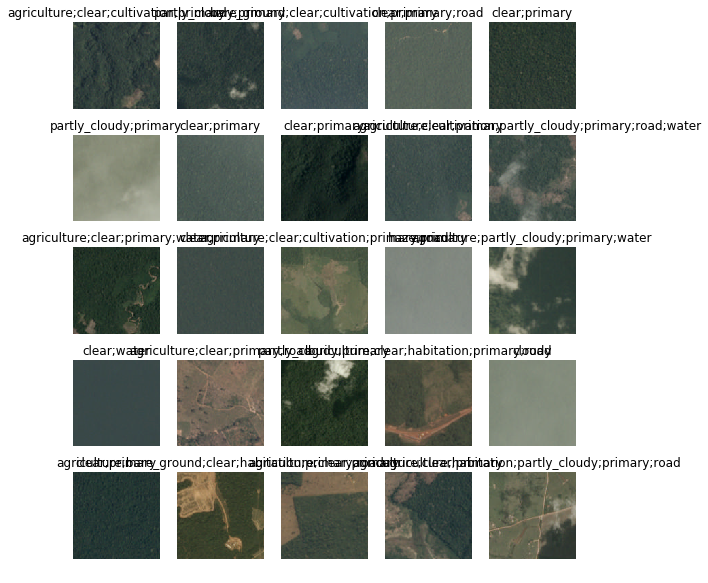

In [0]:
data.show_batch(row = 2, figsize = (9,10))

8. Créez un CNN learner. Par soucis de rapidité, on utilisera cette fois un resnet18 comme architecture. Ajoutez ```accuracy_thresh```comme metrics. Plus d'informations ici : [accuracy_thresh](https://docs.fast.ai/metrics.html#accuracy_thresh)

In [0]:
learn = cnn_learner(data, models.resnet18, metrics =accuracy_thresh)
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.839884,0.700824,0.521429,00:18
1,0.813299,0.686801,0.621429,00:19
2,0.776186,0.664192,0.650000,00:18
3,0.744743,0.649638,0.662500,00:18
4,0.717111,0.639988,0.666071,00:18


9. Notre metrics ```accuracy_thresh``` n'est pas encore très élevée, essayons d'entrainer le modèle pendant encore 4 epochs

In [0]:
# Continue training the model
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.630712,0.626969,0.691071,00:19
1,0.610723,0.602151,0.751786,00:18
2,0.588251,0.588297,0.755357,00:18
3,0.569350,0.586623,0.755357,00:18


10. Nos résultats commencent à être très statisfaisants ! Regardons les résultats via ```show_results```

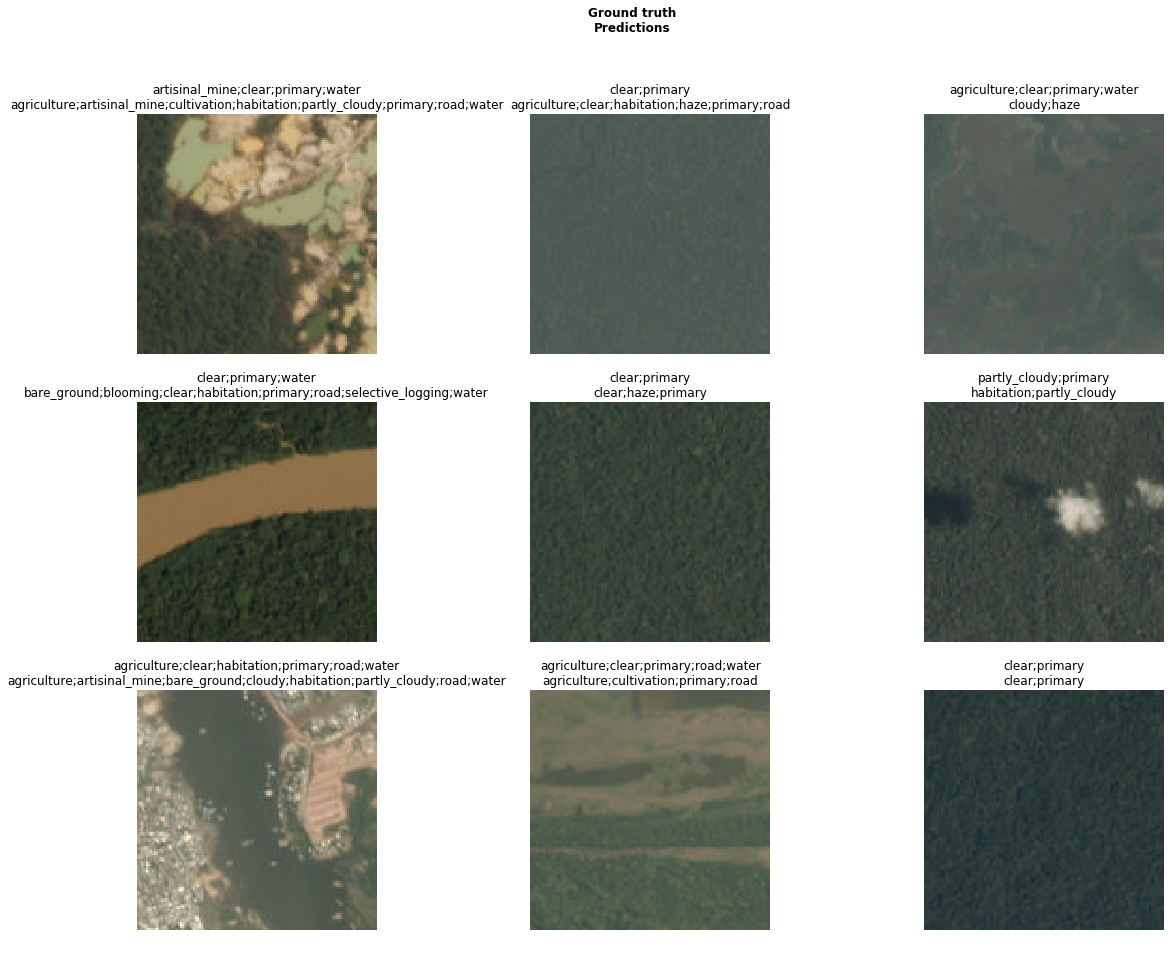

In [0]:
learn.show_results(rows=3, figsize=(20,15))